# Hyper-parameters tuning on IRIS data set

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

Text(0.5, 1.1, 'Non-Nested and Nested Cross Validation on Iris Dataset')

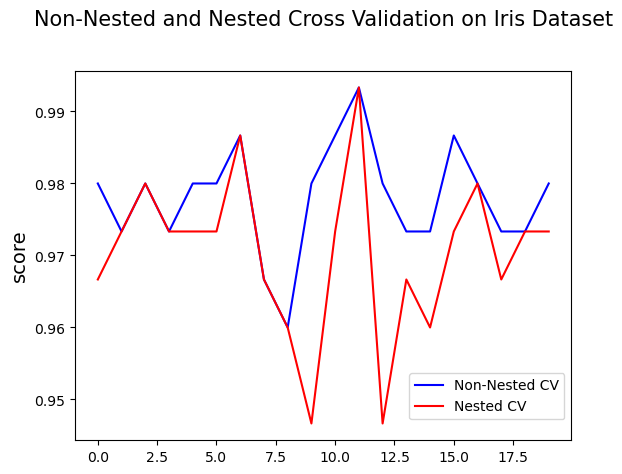

In [34]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt 

X = iris.data
y = iris.target

NUM_TRIALS = 20

param_grid = [
  {'C': np.arange(1, 101, 10), 'kernel': ['linear']},
  {'C': np.arange(1, 121, 10), 'gamma': np.arange(0.0001, 0.001, 0.0005), 'kernel': ['rbf']},
 ]

model = svm.SVC()

non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

for i in range(NUM_TRIALS):
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=i)

    clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_
    b_params = clf.best_params_

    clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

plt.figure()
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="b")
(nested_line,) = plt.plot(nested_scores, color="r")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.2, 1, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)


In [32]:
b_params

{'C': 1, 'kernel': 'linear'}

In [31]:
non_nested_scores.mean(), non_nested_scores.std()

(0.978, 0.007333333333333347)

In [41]:
max(non_nested_scores)

0.9933333333333333

In [42]:
cv = KFold(n_splits=3, shuffle=True, random_state=11)
scores = cross_val_score(estimator=svm.SVC(kernel='linear', C=1), X=X, y=y, cv=cv)

scores.mean(), scores.std(), scores.max()

(0.9933333333333333, 0.009428090415820642, 1.0)

In [47]:
scores = []

for n_split in range(2, 20):
    cv = KFold(n_splits=n_split, shuffle=True, random_state=11)
    scores.append(cross_val_score(estimator=svm.SVC(kernel='linear', C=1), X=X, y=y, cv=cv).mean())

max(scores), np.argmax(scores) + 2

(0.9933333333333333, 3)